In [107]:
#Importing Pandas library (pd)
import pandas as pd

#Uploading Dataframe (df)
df = pd.read_csv('https://raw.githubusercontent.com/pmalviyaa/schulich_data_science/main/sales_data.csv')

#View Dataframe
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [108]:
#Viewing Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [109]:
#Viewing Summary of all columns 
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


<Axes: xlabel='Price', ylabel='Count'>

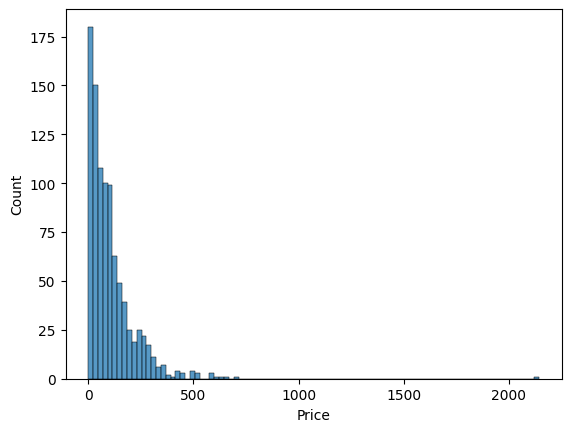

In [110]:
#Importing Packages
import seaborn as sns

#Viewing History plot for the column Price to identify the outlier 
sns.histplot(df['Price'])

In [111]:
#Filtering the data set and identifying the outlier
df[df['Price']> 2000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [112]:
# drop the outlier
df.drop(969, axis=0, inplace=True )

<Axes: xlabel='Price', ylabel='Count'>

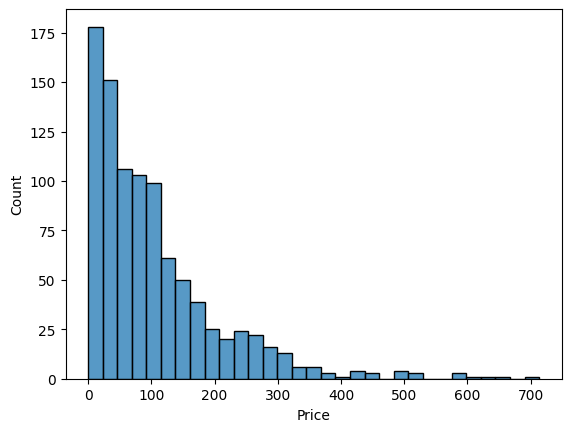

In [113]:
#Viewing History plot 
sns.histplot(df['Price'])

In [114]:
#Filling blank areas with mean in the column  Price
df['Price'] = df['Price'].fillna(df['Price'].mean())

<Axes: >

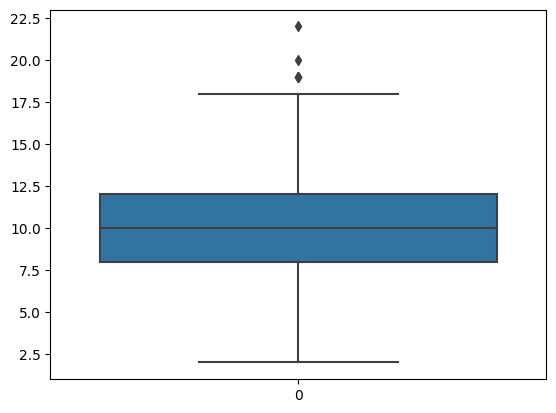

In [115]:
#Viewing Boxplot for the column Units Sold
sns.boxplot(df['Units Sold'])

In [116]:
#Filtering the data set and identifying the outlier
df[df['Units Sold']> 18]

,Product,Region,Price,Units Sold,Sale Date
221,Product_5,Region_5,50.360000,20.0,2022-08-10
232,Product_14,Region_3,104.270000,19.0,2022-08-21
719,Product_50,Region_4,86.730000,22.0,2023-12-21
912,Product_22,Region_8,105.442225,19.0,2024-07-01
962,Product_13,Region_7,0.610000,19.0,2024-08-20


In [117]:
#Dropping the outlier 
df.drop(df[df['Units Sold']> 18].index, axis=0, inplace=True )

<Axes: >

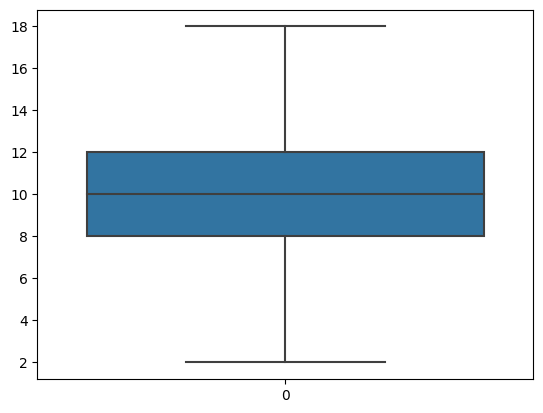

In [118]:
#Viewing Boxplot for the column Units Sold after dropping the outliers
sns.boxplot(df['Units Sold'])

In [119]:
#Filling blank areas with mean in the column Units Sold
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())

In [120]:
#Dropping duplicates from the df because of entry error
df.drop_duplicates(inplace=True)


In [121]:
# Replacing the missing data in the product and region columns
df['Product'] = df['Product'].fillna('Other')
df['Region'] = df['Region'].fillna('Other')

In [122]:
# Checking if the data is clean as desired
df.describe(include='all')


,Product,Region,Price,Units Sold,Sale Date
count,994,994,994.000000,994.000000,994
unique,51,11,NaN,NaN,994
top,Other,Region_9,NaN,NaN,2022-01-01
freq,100,104,NaN,NaN,1
mean,NaN,NaN,104.490020,10.017317,NaN
std,NaN,NaN,98.402173,2.926543,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.635000,8.000000,NaN
50%,NaN,NaN,87.645000,10.000000,NaN
75%,NaN,NaN,133.145000,12.000000,NaN


In [123]:
# Dropping Values that indicate Other in the columns Product and region
df.drop(df[df['Region'] == 'Other'].index, inplace = True)
df.drop(df[df['Product'] == 'Other'].index, inplace = True)
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,804,804,804.000000,804.000000,804
unique,50,10,NaN,NaN,804
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,27,96,NaN,NaN,1
mean,NaN,NaN,104.483914,10.040010,NaN
std,NaN,NaN,99.361976,2.974929,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.762500,8.000000,NaN
50%,NaN,NaN,87.775000,10.000000,NaN
75%,NaN,NaN,129.487500,12.000000,NaN


# Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?
 My data cleaning approach involved identifying and dropping the outliers, filling blank areas with mean for the price and units sold columns, dropping duplicates, replacing the missing data in the product and region columns with "other" and dropping values that indicate "other" in the columns product and region.After I analyzed the history plot for the column price I was able to find the outlier right away as it was the only value above 2000 and it seemed illogical, so I proceeded with removing it to make better sense of the data. For the Units Sold column I began with using the boxplot approach to identify the outlier and decided to remove values higher than 18 as it helped reduce variability in the data. For the missing values in price and units sold columns I replaced them with the mean value to make more sense out of the data as with missing values the data was not able to match up with other columns and was increasing inconsistency with the data. I dropped duplicates across all columns assuming them as errors upon entry. Lastly, replaced missing values for the product and region columns with “Other” and ended up dropping them to trim the data in order to come up with a more accurate sales strategy. 


<Axes: xlabel='Units Sold', ylabel='Price'>

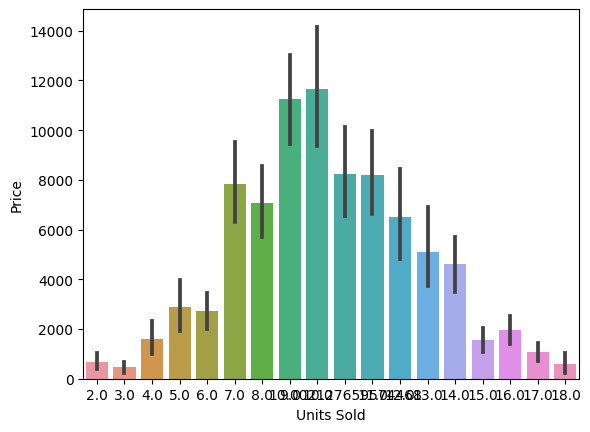

In [143]:
#Creating a barplot for a relationship between units sold and price 
sns.barplot(data = df, x = "Units Sold", y = "Price", estimator=sum)

<Axes: xlabel='Units Sold', ylabel='Region'>

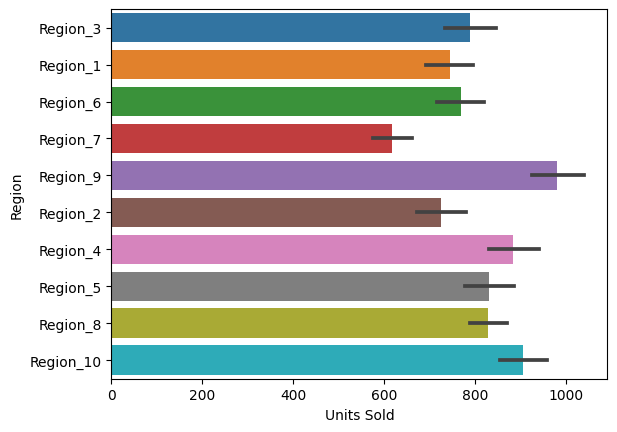

In [124]:
#Creating a barplot for a relationship between units sold and region
sns.barplot(data = df, x = 'Units Sold', y = 'Region', estimator=sum)


In [125]:
#Adding a column for Total Revenue
df["Total Revenue"] = df["Units Sold"]* df["Price"]
df.head()

,Product,Region,Price,Units Sold,Sale Date,Total Revenue
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38


<Axes: xlabel='Total Revenue', ylabel='Region'>

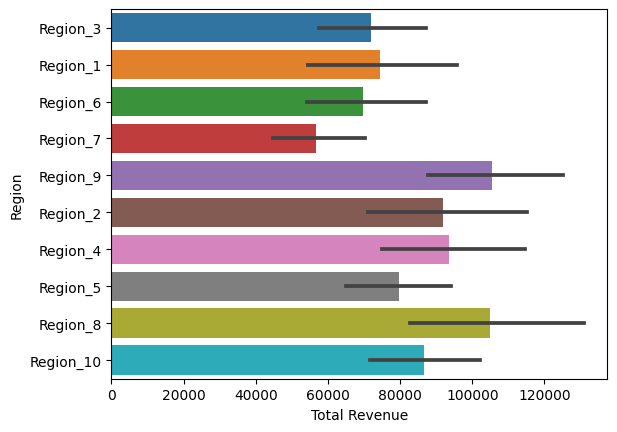

In [126]:
#Creating a barplot for a relationship between Total revenue and region
sns.barplot(data = df, x = 'Total Revenue', y = 'Region', estimator=sum)

<Axes: xlabel='Product'>

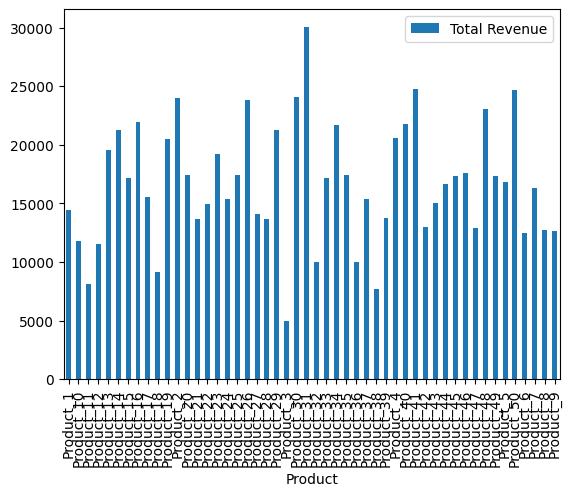

In [128]:
#Grouping the  revenue data by product to show the total revenue in a bar chart
df_Product=df[["Product", "Total Revenue"]]
df_Product.groupby("Product").sum().plot(kind="bar")

# What conclusions can you draw about sales performance of various products and regions? What recommendations do you have for the business?

For the bar plot that includes regions vs units sold, I was able to analyze that region 9 and 10 had the highest sales which helps us understand that the company should be focusing on these regions and should be allocating resources appropriately. For example the stock should be distributed in higher quantities at these regions and in lower quantities for the  underperforming regions(like region 7), this will help towards proper distribution of their product which will increase sales and generate more revenue for the business. More conclusions that can be drawn include Region 8 & 9 had the highest revenue in terms of price of units and number of units sold  and product 31 brought highest revenue to the firm. The organization should try to conduct more research towards why product 31 is performming so well and try to implement some changes to the underperforming products. 
